# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API keys
from config import wkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
citylist = []
cloudiness= []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

units = "metric"
base_url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{base_url}appid={wkey}&units={units}&q="
line = "-----------------------------"

print("Beginning Data Retrieval")
print(line)
count = 0
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        print(f"Processing Record {count} / {city}")
        citylist.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        count += 1
    except:
        print("City not found. Skipping...")
        cities.remove(city)
        count += 1
        pass
print(line)
print("Data Retrieval Complete")
print(line)


Beginning Data Retrieval
-----------------------------
Processing Record 0 / barrow
Processing Record 1 / constitucion
Processing Record 2 / east london
Processing Record 3 / new norfolk
Processing Record 4 / yanchukan
City not found. Skipping...
Processing Record 5 / tuktoyaktuk
Processing Record 6 / longyearbyen
Processing Record 7 / mataura
Processing Record 8 / havre-saint-pierre
Processing Record 9 / geraldton
Processing Record 10 / vallenar
Processing Record 11 / nizhneyansk
City not found. Skipping...
Processing Record 12 / bethel
Processing Record 13 / chernyshevskiy
Processing Record 14 / hithadhoo
Processing Record 15 / hilo
Processing Record 16 / karratha
Processing Record 17 / busselton
Processing Record 18 / rikitea
Processing Record 19 / belushya guba
City not found. Skipping...
Processing Record 20 / illoqqortoormiut
City not found. Skipping...
Processing Record 21 / agadez
Processing Record 22 / dikson
Processing Record 23 / san carlos de bariloche
Processing Record 24 

Processing Record 229 / sokoni
Processing Record 230 / grand gaube
Processing Record 231 / banda aceh
Processing Record 232 / moissala
Processing Record 233 / minot
Processing Record 234 / waipawa
Processing Record 235 / lopez jaena
Processing Record 236 / mlonggo
Processing Record 237 / pimentel
Processing Record 238 / sinnamary
Processing Record 239 / walvis bay
Processing Record 240 / taoudenni
Processing Record 241 / rapid city
Processing Record 242 / kaitangata
Processing Record 243 / margate
Processing Record 244 / pisco
Processing Record 245 / north platte
Processing Record 246 / esperance
Processing Record 247 / kremnica
Processing Record 248 / yellowknife
Processing Record 249 / pinheiro machado
Processing Record 250 / powell river
Processing Record 251 / wulanhaote
City not found. Skipping...
Processing Record 252 / maneadero
Processing Record 253 / shelburne
Processing Record 254 / boyolangu
Processing Record 255 / saint-francois
Processing Record 256 / chilca
Processing Rec

Processing Record 460 / qui nhon
Processing Record 461 / adrar
Processing Record 462 / ushumun
Processing Record 463 / college
Processing Record 464 / kingsville
Processing Record 465 / cockburn town
Processing Record 466 / beloha
Processing Record 467 / livingstone
Processing Record 468 / gizo
Processing Record 469 / riberalta
Processing Record 470 / dingle
Processing Record 471 / nikel
Processing Record 472 / dongsheng
Processing Record 473 / knysna
Processing Record 474 / waingapu
Processing Record 475 / uruguaiana
Processing Record 476 / colares
Processing Record 477 / beringovskiy
Processing Record 478 / port-gentil
Processing Record 479 / upington
Processing Record 480 / tymovskoye
Processing Record 481 / garowe
Processing Record 482 / darnah
Processing Record 483 / krasnoselkup
Processing Record 484 / muriwai beach
Processing Record 485 / canete
Processing Record 486 / waddan
Processing Record 487 / torbay
Processing Record 488 / inhambane
Processing Record 489 / mwaya
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_data_dict = {
    'City':citylist, "Cloudiness":cloudiness, "Country":country, "Date":date, "Humidity":humidity,
    "Lat":lat, "Lng":lng, "Max Temp":max_temp, "Wind Speed":wind_speed
}

city_data_df = pd.DataFrame(city_data_dict)

city_data_df.to_csv(output_data_file)

In [7]:
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Barrow,40,US,1579968036,68,71.29,-156.79,-29.00,3.60
1,Constitucion,0,CL,1579968097,38,-35.33,-72.42,22.34,3.69
2,East London,24,ZA,1579968097,65,-33.02,27.91,27.00,3.10
3,New Norfolk,100,AU,1579968097,72,-42.78,147.06,18.89,1.34
4,Tuktoyaktuk,100,CA,1579968050,97,69.45,-133.04,-25.38,8.43


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [ ]:
# trying to get the unixdate to real date.

# date = pd.to_datetime(city_data_df['Date'], unit='ms')
# df.loc[df.credit_score > 800, 'credit_score'] /= 100
# city_data_df['Date'] = city_data_df.loc[city_data_df.Date, 'Date']/60/60/24
# date

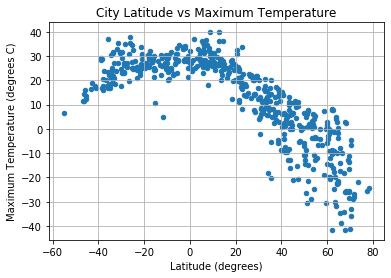

In [8]:
lat_temp_plot = city_data_df.plot.scatter(y="Max Temp", x="Lat", grid=True)
plt.ylabel("Maximum Temperature (degrees C)")
plt.xlabel('Latitude (degrees)')
plt.title(f'City Latitude vs Maximum Temperature')
plt.savefig('output_data/cit-vs-temp.png')
plt.show()

Explain what the code is and analyzing: 
Plot to see if the cities maxiumn temperature is dependant of the latitude. 

#### Latitude vs. Humidity Plot

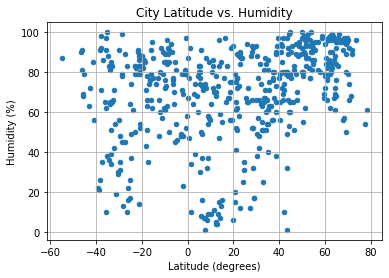

In [9]:
lat_hum_plot = city_data_df.plot.scatter(y='Humidity', x='Lat', grid=True)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (degrees)")
plt.title("City Latitude vs. Humidity")
plt.savefig('output_data/cit-vs-humidity.png')
plt.show()

Explain what the code is and analyzing: 
Plot to see if the cities humidity is dependant of the latitude. 

#### Latitude vs. Cloudiness Plot

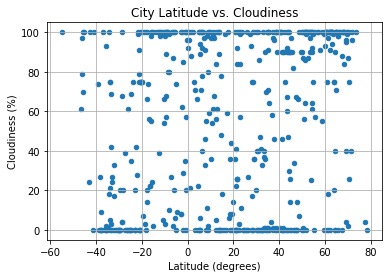

In [10]:
lat_clouds_plot = city_data_df.plot.scatter(y='Cloudiness', x='Lat', grid=True)
plt.ylabel("Cloudiness (%)")
plt.xlabel('Latitude (degrees)')
plt.title("City Latitude vs. Cloudiness")
plt.savefig('output_data/cit-vs-coudiness.png')
plt.show()

Explain what the code is and analyzing: 
Plot to see if the cities cloudiness is dependant of the latitude. 

#### Latitude vs. Wind Speed Plot

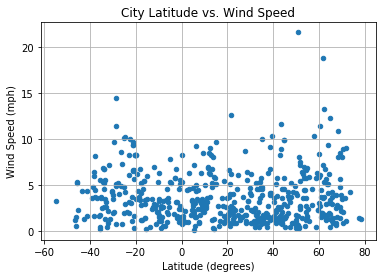

In [11]:
lat_clouds_plot = city_data_df.plot.scatter(y='Wind Speed', x='Lat', grid=True)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (degrees)")
plt.title("City Latitude vs. Wind Speed")
plt.savefig('output_data/cit-vs-wind.png')
plt.show()

Explain what the code is and analyzing: 
Plot to see if the cities wind speed is dependant of the latitude. 

## Linear Regression

In [38]:
# OPTIONAL: Create a function to create Linear Regression plots
def line_regress_function(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    r_value = f'r-squared = {round(rvalue,4)}'
    plt.scatter(x_values, y_values)
    plt.grid()
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(f'{line_eq} {r_value}', (np.min(x_values),np.min(y_values)), fontsize=10, color='r')
#     print(plt.annotate(line_eq, (40,-34), fontsize=15, color='r'))
#     print(f'The r-squared is: {rvalue}')
    return(plt)

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem_df = city_data_df[city_data_df["Lat"]>0]
southern_hem_df = city_data_df[city_data_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

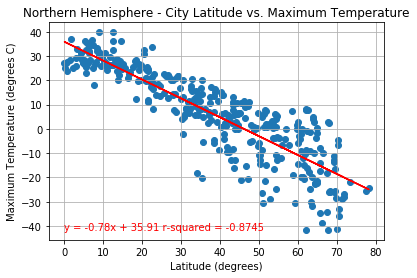

In [39]:
line_regress_function(northern_hem_df['Lat'],northern_hem_df["Max Temp"])
plt.ylabel("Maximum Temperature (degrees C)")
plt.xlabel("Latitude (degrees)")
plt.title("Northern Hemisphere - City Latitude vs. Maximum Temperature")
plt.savefig('output_data/Northern-Hemisphere-cit-vs-temp-regress.png')
plt.show()

Explain what the linear regression is modelling such as any relationships you notice and any other analysis you may have: 
In the northern hemisphere, it could be said that the maximum temperature is corellated to the latitude of that city.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.45947188718171467


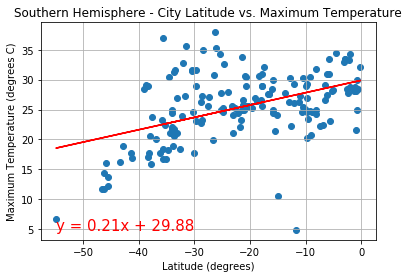

In [20]:
line_regress_function(southern_hem_df['Lat'],southern_hem_df["Max Temp"])
plt.ylabel("Maximum Temperature (degrees C)")
plt.xlabel("Latitude (degrees)")
plt.title("Southern Hemisphere - City Latitude vs. Maximum Temperature")
plt.savefig('output_data/Southern-Hemisphere-cit-vs-temp-regress.png')
plt.show()

Explain what the linear regression is modelling such as any relationships you notice and any other analysis you may have: 
In the sourthern hemisphere, the maximum temperature may not corellated to the latitude of that city.It should be noted that there are far less data points in the sothern hemisphere (at least when I did this particulare data pull).

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.4774909574750266


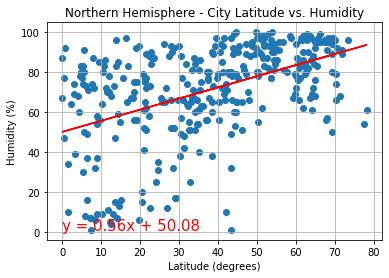

In [21]:
line_regress_function(northern_hem_df['Lat'],northern_hem_df["Humidity"])
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (degrees)")
plt.title("Northern Hemisphere - City Latitude vs. Humidity")
plt.savefig('output_data/Northern-Hemisphere-cit-vs-humidity-regress.png')
plt.show()

Explain what the linear regression is modelling such as any relationships you notice and any other analysis you may have: 
In the northern hemisphere, the humdity is probably not corellated to the latitude of that city. Consider looking seasonally.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12020484173187543


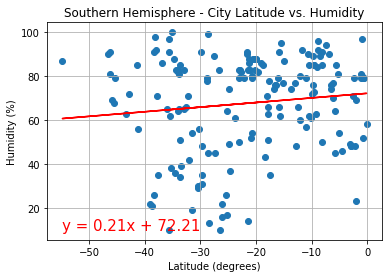

In [22]:
line_regress_function(southern_hem_df['Lat'],southern_hem_df["Humidity"])
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (degrees)")
plt.title("Southern Hemisphere - City Latitude vs. Humidity")
plt.savefig('output_data/Southern-Hemisphere-cit-vs-humidity-regress.png')
plt.show()

Explain what the linear regression is modelling such as any relationships you notice and any other analysis you may have: 
In the southern hemisphere, the humdity is probably not corellated to the latitude of that city. Consider looking seasonally.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
line_regress_function(northern_hem_df['Lat'],northern_hem_df["Cloudiness"])
plt.ylabel("Cloudiness (%)")
plt.xlabel('Latitude (degrees)')
plt.title("Northern Hemisphere - City Latitude vs. Cloudiness")
plt.savefig('output_data/Northern-Hemisphere-cit-vs-coludiness-regress.png')
plt.show()

Explain what the linear regression is modelling such as any relationships you notice and any other analysis you may have: 
In the northern hemisphere, the cloudiness is probably not corellated to the latitude of that city.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
line_regress_function(southern_hem_df['Lat'],southern_hem_df["Cloudiness"])
plt.ylabel("Cloudiness (%)")
plt.xlabel('Latitude (degrees)')
plt.title("Southern Hemisphere - City Latitude vs. Cloudiness")
plt.savefig('output_data/Southern-Hemisphere-cit-vs-coludiness-regress.png')
plt.show()

Explain what the linear regression is modelling such as any relationships you notice and any other analysis you may have: 
In the sourthern hemisphere, the cloudiness is probably not corellated to the latitude of that city.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
line_regress_function(northern_hem_df['Lat'],northern_hem_df["Wind Speed"])
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (degrees)")
plt.title("Northern Hemisphere - City Latitude vs. Wind Speed")
plt.savefig('output_data/Northern-Hemisphere-cit-vs-wind-regress.png')
plt.show()

Explain what the linear regression is modelling such as any relationships you notice and any other analysis you may have: 
In the northern hemisphere, the wind speed is probably not corellated to the latitude of that city. The wind speed seems to be mostly constant across latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
line_regress_function(southern_hem_df['Lat'],southern_hem_df["Wind Speed"])
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (degrees)")
plt.title("Southern Hemisphere - City Latitude vs. Wind Speed")
plt.savefig('output_data/Southern-Hemisphere-cit-vs-wind-regress.png')
plt.show()

Explain what the linear regression is modelling such as any relationships you notice and any other analysis you may have: 
In the sourthern hemisphere, the wind speed is probably not corellated to the latitude of that city. The wind speed seems to be mostly constant across latitude.